##  Выпускная квалификационная работа на тему: 
# Алгоритм статистического сопоставления термодинамических баз данных
### Студент: Щепалов К.П.

####  Далее будет представлена самостоятельная апробация разработанного решения в рамках ВКР

#### Первым этапом в работе алгоритма является определение некоторых важных настроек, а именно:
1. Исследуемый элемент
2. Пути до файлов термодинамических баз данных
3. Наименования файлов термодинамических баз данных
4. Путь до файла с опытными данными
5. Наименование файла с опытными данными


In [1]:
# Иницализация параметров для работы алгоритма

from setting_app import ConfigurateApp
app = ConfigurateApp()

# В качестве исследуемого элемента необходимо указать Cr.


Привет! 
Для сопоставления ТДБ файлов далее необходимо указать некоторую информацию ниже./
Введите исследуемый элемент:   CR

Вы внесли CR. Подтвердите выбор (введите Y/N)   y

Укажите путь до директории с термодинамическими базами данных:
В папке должны находиться только ТДБ файлы!
 (Пример: C:/main_folder/tdb_folder/)         :./tdb_files/

Вы внесли ./tdb_files/. Подтвердите выбор (введите Y/N)   y
Укажите номер первого ТДБ файла для сопоставления 
(1) CoCr-01Oik.tdb, (2) CoCr-01Oik_modified.tdb, (3) CoCr-18Cac.tdb, (4) CoCr-18Cac_modified.tdb:   1

Вы внесли 1. Подтвердите выбор (введите Y/N)   y
Укажите номер второго ТДБ файла для сопоставления 
(1) CoCr-01Oik.tdb, (2) CoCr-01Oik_modified.tdb, (3) CoCr-18Cac.tdb, (4) CoCr-18Cac_modified.tdb:   

Вы внесли . Подтвердите выбор (введите Y/N)   ./tdb_files/
Укажите номер второго ТДБ файла для сопоставления 
(1) CoCr-01Oik.tdb, (2) CoCr-01Oik_modified.tdb, (3) CoCr-18Cac.tdb, (4) CoCr-18Cac_modified.tdb:   3

Вы внесли 3. Подтвердите 

#### Следующие ячейки позволяют явно проверить корректность введенной информации

In [2]:
tdb1_local_path = app.tdb_path + app.tdb_first_name
tdb2_local_path = app.tdb_path + app.tdb_second_name

tdb_list = [tdb1_local_path, tdb2_local_path]
tdb_names = [app.tdb_first_name, app.tdb_second_name]


tdb_list #ТДБ файлы для сопоставления

['./tdb_files/CoCr-01Oik.tdb', './tdb_files/CoCr-18Cac.tdb']

#### Необходимо проверить, какая информация содержится в экспериментальных данных

In [3]:
import pandas as pd
observer_data = app.data_path + app.experemental_data # Путь до экспериментальных данных

df = pd.read_excel(observer_data)
df # Экспериментальных данных

C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,cr_conc,T,phase
0,0.382368,1321.348315,fcc_a1
1,0.384427,1226.966292,fcc_a1
2,0.389723,1269.662921,fcc_a1
3,0.408596,1370.786517,fcc_a1
4,0.419078,1471.910112,fcc_a1
5,0.420822,1422.471910,fcc_a1


#### Посредством разработанного модуля для модификации ТДБ файлов реализуем программный интерфейс внутри файлов для работы с библиотекой PyCalphad 

In [4]:
from create_api_for_tdb import CreateTDBapi # Собственный модуль для модификации исходного ТДБ файла

# Запуск добавит функции внутри ТДБ файла для обращения к ним через PyCalphad

functions = {}

for i, tdb in enumerate(tdb_names):
    functions_list = CreateTDBapi(tdb_list[i]).functions
    functions[tdb[:-4] + '_modified.tdb'] = {i.split()[1]: i.split()[2][:-1] for i in functions_list}
    
functions # Список доступных функций для подстановки в алгоритм. Так же рядом указывается математическое ожидание параметра

{'CoCr-01Oik_modified.tdb': {'TC_HCP_A3_2_V1': '+1396.00',
  'BM_HCP_A3_3_V1': '+1.35',
  'TC_FCC_A1_5_V1': '+1396.00',
  'BM_FCC_A1_6_V1': '+1.35',
  'TC_BCC_A2_8_V1': '+1450.00',
  'BM_BCC_A2_9_V1': '+1.35',
  'TC_BCC_A2_12_V1': '-311.50',
  'BM_BCC_A2_13_V1': '-0.008',
  'TC_FCC_A1_15_V1': '-1109.00',
  'BM_FCC_A1_16_V1': '-2.46',
  'TC_HCP_A3_18_V1': '-1109.00',
  'BM_HCP_A3_19_V1': '-2.46',
  'L_LIQUID_21_L0_V1': '-11900',
  'L_LIQUID_21_L0_V2': '+2.4',
  'L_LIQUID_22_L1_V1': '-6500',
  'L_LIQUID_22_L1_V2': '+0.1',
  'L_FCC_A1_23_L0_V1': '-23080',
  'L_FCC_A1_23_L0_V2': '+8.34',
  'L_FCC_A1_24_L1_V1': '+12370',
  'L_FCC_A1_24_L1_V2': '-12.08',
  'TC_FCC_A1_25_L0_V1': '-8082',
  'TC_FCC_A1_26_L1_V1': '+6684',
  'L_BCC_A2_27_L0_V1': '+4820',
  'L_BCC_A2_27_L0_V2': '-3.225',
  'L_BCC_A2_28_L1_V1': '+14250',
  'L_BCC_A2_28_L1_V2': '-15.865',
  'L_HCP_A3_29_L0_V1': '-25149',
  'L_HCP_A3_29_L0_V2': '+13',
  'L_HCP_A3_30_L1_V1': '+1719',
  'L_HCP_A3_30_L1_V2': '-3',
  'TC_HCP_A3_31_L0_V1

Для дальнейшего анализа будут использованы функции, отвечающие за расчет границ фазовых полей для фазы FCC.

Наименования функций для ТДБ файла CoCr-01Oik_modified.tdb: L_FCC_A1_23_L0_V1 и L_FCC_A1_23_L0_V2 

Наименования функций для ТДБ файла CoCr-18Cac_modified.tdb: L_FCC_A1_25_L0_V1 и L_FCC_A1_25_L0_V2

### Расчет функции правдоподобия для файла CoCr-01Oik

#### Для запуска расчета логаримической функции правдоподобия необходимо задать ряд необходимых переменных

In [6]:
tdb = app.tdb_first_name # ТДБ файл, по которому будет рассчитываться модель
research_phase = 'FCC_A1' # Исследуемая фаза из опытных данных (Важно! Она должна соответствовать наименованию в ТДБ файле)
boundary_phase = 'SIGMA_OLD' # Наименование пограничной фазы с исследумой фазой из экспериментальных данных 
                             #(Так же должна соответствовать наименованию в ТДБ файле)

functions_name = ['L_FCC_A1_23_L0_V1', 'L_FCC_A1_23_L0_V2'] #Наименования функций, по которым будет определяться сравнение 
                                                            #ТДБ файлов (Наименования функций определяются модулем модификации)
    
samples_num = 14000 # Количество сэмплов для Байесовского вариационного вывода (Результаты ВКР представлены при 14000 сэмплах)

#### Для удобства сформируем словарь для передачи аргументов в алгоритм

In [7]:
from pycalphad import Database

data_path = app.data_path + app.experemental_data # Путь до опытных данных

sub_params = {'element':app.el, 
              'functions_to_alg': {},
              'research_phase': research_phase,
              'boundary_phase': boundary_phase,
              'tdb_name': tdb.split('.')[0] }

tdb_key= tdb[:-4] + '_modified.tdb'

for function in functions_name:
    sub_params['functions_to_alg'][function] = float(functions[tdb_key][function])
    
db = Database(app.tdb_path + tdb[:-4] + '_modified.tdb') # Объявление файла ТДБ файла

In [8]:
from calculate import main # Собственный модуль для запуска Байесовского вариационного вывода

if __name__ == '__main__':
    main(data_path, samples_num, db, sub_params) #Запуск Байесовского вариационного вывода

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\pymc\data.py:273: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


Output()

Finished [100%]: Average Loss = 7.6342e+13


Расчет модели для файла CoCr-01Oik успешно завершен. 

Для доступа к модели обратитесь по пути: ./models/CoCr-01Oik_model_100.pkl


### Расчет функции правдоподобия для файла CoCr-18Cac

In [9]:
tdb = app.tdb_second_name # ТДБ файл, по которому будет рассчитываться модель
research_phase = 'FCC_A1' # Исследуемая фаза из опытных данных (Важно! Она должна соответствовать наименованию в ТДБ файле)
boundary_phase = 'SIGMA_D8B' # Наименование пограничной фазы с исследумой фазой из экспериментальных данных 
                             #(Так же должна соответствовать наименованию в ТДБ файле)

functions_name = ['L_FCC_A1_25_L0_V1', 'L_FCC_A1_25_L0_V2'] #Наименования функций, по которым будет определяться сравнение 
                                                            #ТДБ файлов (Наименования функций определяются модулем модификации)
    
samples_num = 14000 # Количество сэмплов для Байесовского вариационного вывода (Результаты ВКР представленны при 14 000 сэмплах)

In [10]:
from pycalphad import Database

data_path = app.data_path + app.experemental_data # Путь до опытных данных

sub_params = {'element':app.el, 
              'functions_to_alg': {},
              'research_phase': research_phase,
              'boundary_phase': boundary_phase,
              'tdb_name': tdb.split('.')[0] }

tdb_key= tdb[:-4] + '_modified.tdb'

for function in functions_name:
    sub_params['functions_to_alg'][function] = float(functions[tdb_key][function])
    
db = Database(app.tdb_path + tdb[:-4] + '_modified.tdb') # Объявление файла ТДБ файла

In [11]:
from calculate import main

if __name__ == '__main__':
    main(data_path, samples_num, db, sub_params) #Запуск Байесовского вариационного вывода

C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\pymc\data.py:273: FutureWarning: ConstantData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


Output()

Finished [100%]: Average Loss = 4.5257e+14


Расчет модели для файла CoCr-18Cac успешно завершен. 

Для доступа к модели обратитесь по пути: ./models/CoCr-18Cac_model_100.pkl


#### Расчеты двух моделей заверешны. Для удобства они были сохранены для дальнейшего использования

### Анализ рассчитанных моделей ТДБ файлов

#### Загрузка моделей сопоставляемых файлов ТДБ

In [12]:
import cloudpickle

with open('./models/CoCr-01Oik_model_14000.pkl', 'rb') as buff: # Рассчитанная модель для CoCr-01Oik на 14000 сэмплах
    model_first_tdb = cloudpickle.load(buff)
        
model1 = model_first_tdb['model']
advi1 = model_first_tdb['advi']
tracker1 = model_first_tdb['tracker']
mean_field1 = model_first_tdb['mean_field']

In [13]:
with open('./models/CoCr-18Cac_model_14000.pkl', 'rb') as buff: # Рассчитанная модель для CoCr-18Cac на 14000 сэмплах
    model_second_tdb = cloudpickle.load(buff)
        
model2 = model_second_tdb['model']
advi2 = model_second_tdb['advi']
tracker2 = model_second_tdb['tracker']
mean_field2 = model_second_tdb['mean_field']

#### Анализ сходимости нижней вариационной границы Байесовского вариационного вывода

Text(0.5, 0, 'Количество итераций, шт')

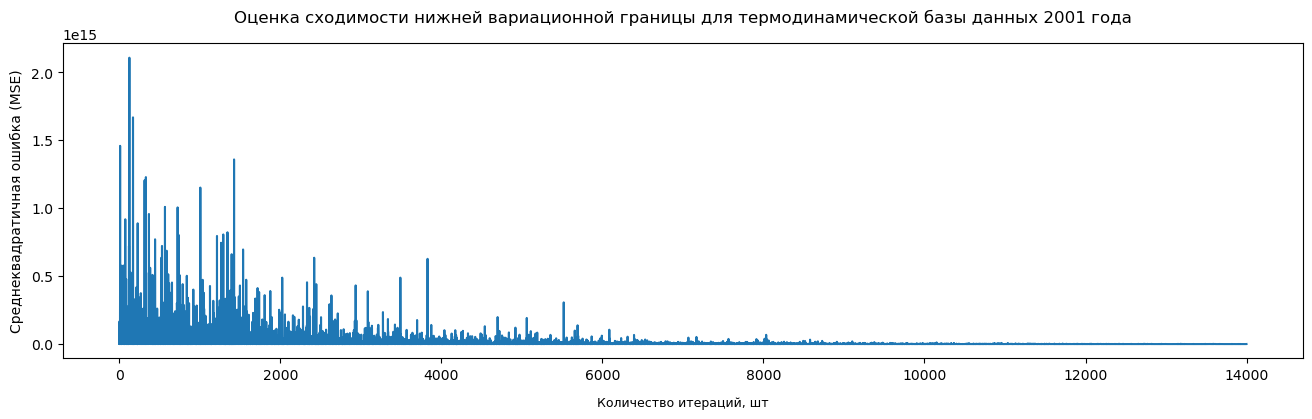

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
hist_ax = fig.add_subplot(212)
hist_ax.plot(advi1.hist)
hist_ax.set_title("Оценка сходимости нижней вариационной границы для термодинамической базы данных 2001 года", size = 12, pad = 15 );
hist_ax.set_ylabel("Среднеквадратичная ошибка (MSE)", rotation=90, labelpad=5, size = 10)
hist_ax.set_xlabel("Количество итераций, шт", rotation=0, labelpad=10, size = 9)

Text(0.5, 0, 'Количество итераций, шт')

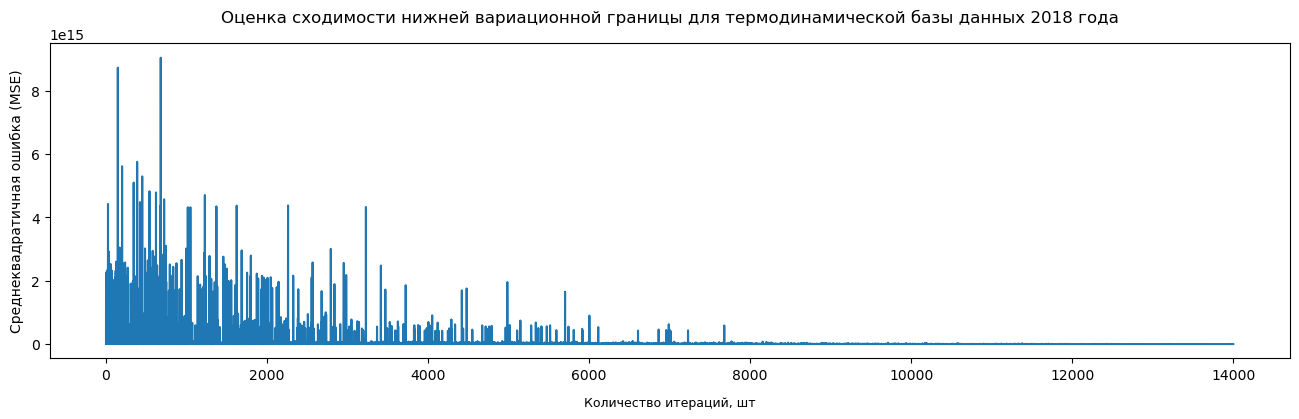

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
hist_ax = fig.add_subplot(212)
hist_ax.plot(advi2.hist)
hist_ax.set_title("Оценка сходимости нижней вариационной границы для термодинамической базы данных 2018 года", size = 12, pad = 15 );
hist_ax.set_ylabel("Среднеквадратичная ошибка (MSE)", rotation=90, labelpad=5, size = 10)
hist_ax.set_xlabel("Количество итераций, шт", rotation=0, labelpad=10, size = 9)

#### Распределение термодинамического параметра   L_FCC_A1_23_L0_V1 для CoCr-01Oik

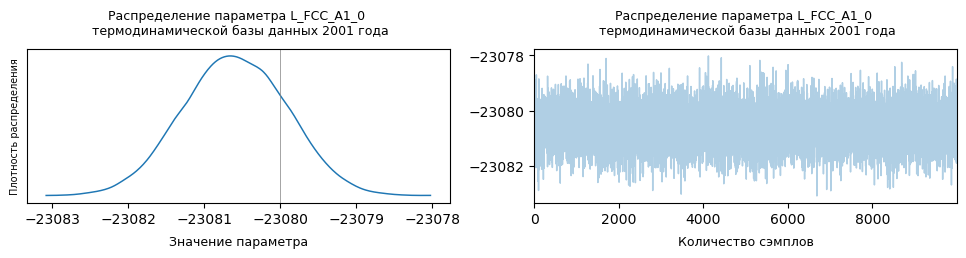

In [17]:
import arviz as az

trace_01 = mean_field1.sample(10000)
axes = az.plot_trace(trace_01,var_names = 'vL0_0', backend = 'matplotlib')
axes.tolist()[0][0].set_title('Распределение параметра L_FCC_A1_0 \n термодинамической базы данных 2001 года', pad = 12, size = 9)
axes.tolist()[0][0].set_ylabel("Плотность распределения", rotation=90, labelpad=5, size = 7)
axes.tolist()[0][0].set_xlabel("Значение параметра", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][1].set_title('Распределение параметра L_FCC_A1_0 \n термодинамической базы данных 2001 года', pad = 12, size = 9)
axes.tolist()[0][1].set_xlabel("Количество сэмплов", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][0].axvline(x = -23080, linewidth =0.5, color = 'grey', label = 'axvline - full height')

#### Распределение термодинамического параметра L_FCC_A1_23_L0_V2 для CoCr-01Oik

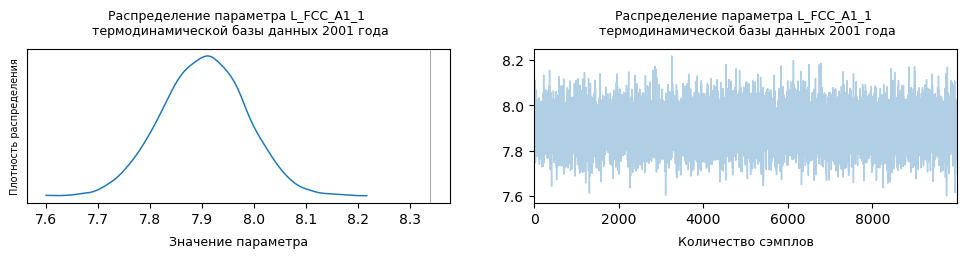

In [19]:
import arviz as az

trace_t = mean_field1.sample(10000)
axes = az.plot_trace(trace_t,var_names = 'vL0_1', backend = 'matplotlib')
axes.tolist()[0][0].set_title('Распределение параметра L_FCC_A1_1 \n термодинамической базы данных 2001 года', pad = 12, size = 9)
axes.tolist()[0][0].set_ylabel("Плотность распределения", rotation=90, labelpad=5, size = 7)
axes.tolist()[0][0].set_xlabel("Значение параметра", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][1].set_title('Распределение параметра L_FCC_A1_1 \n термодинамической базы данных 2001 года', pad = 12, size = 9)
axes.tolist()[0][1].set_xlabel("Количество сэмплов", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][0].axvline(x = 8.34, linewidth =0.5, color = 'grey', label = 'axvline - full height')


#### Распределение термодинамического параметра L_FCC_A1_25_L0_V1 для CoCr-18Cac

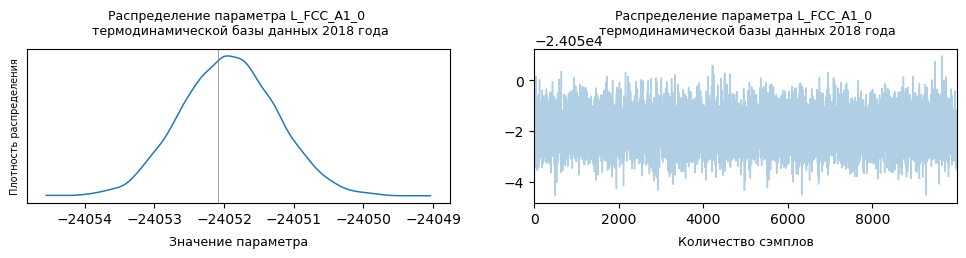

In [23]:
import arviz as az

trace_t = mean_field2.sample(10000)
axes = az.plot_trace(trace_t,var_names = 'vL0_0', backend = 'matplotlib')
axes.tolist()[0][0].set_title('Распределение параметра L_FCC_A1_0 \n термодинамической базы данных 2018 года', pad = 12, size = 9)
axes.tolist()[0][0].set_ylabel("Плотность распределения", rotation=90, labelpad=5, size = 7)
axes.tolist()[0][0].set_xlabel("Значение параметра", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][1].set_title('Распределение параметра L_FCC_A1_0 \n термодинамической базы данных 2018 года', pad = 12, size = 9)
axes.tolist()[0][1].set_xlabel("Количество сэмплов", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][0].axvline(x = -24052.09, linewidth =0.5, color = 'grey', label = 'axvline - full height')

#### Распределение термодинамического параметра L_FCC_A1_25_L0_V2 для CoCr-18Cac

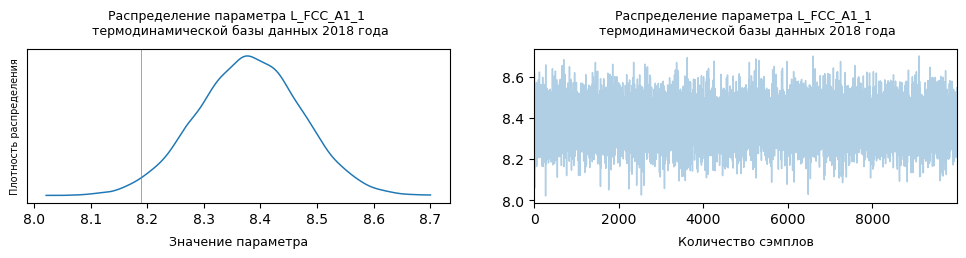

In [25]:
import arviz as az

trace_018 = mean_field2.sample(10000)
axes = az.plot_trace(trace_018,var_names = 'vL0_1', backend = 'matplotlib')
axes.tolist()[0][0].set_title('Распределение параметра L_FCC_A1_1 \n термодинамической базы данных 2018 года', pad = 12, size = 9)
axes.tolist()[0][0].set_ylabel("Плотность распределения", rotation=90, labelpad=5, size = 7)
axes.tolist()[0][0].set_xlabel("Значение параметра", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][1].set_title('Распределение параметра L_FCC_A1_1 \n термодинамической базы данных 2018 года', pad = 12, size = 9)
axes.tolist()[0][1].set_xlabel("Количество сэмплов", rotation=0, labelpad=6, size = 9)
axes.tolist()[0][0].axvline(x = 8.1884, linewidth =0.5, color = 'grey', label = 'axvline - full height')

#### Совместное распределение параметров L_FCC_A1_23_L0_V1 и L_FCC_A1_25_L0_V1

D:\Files\Soft\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Files\Soft\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


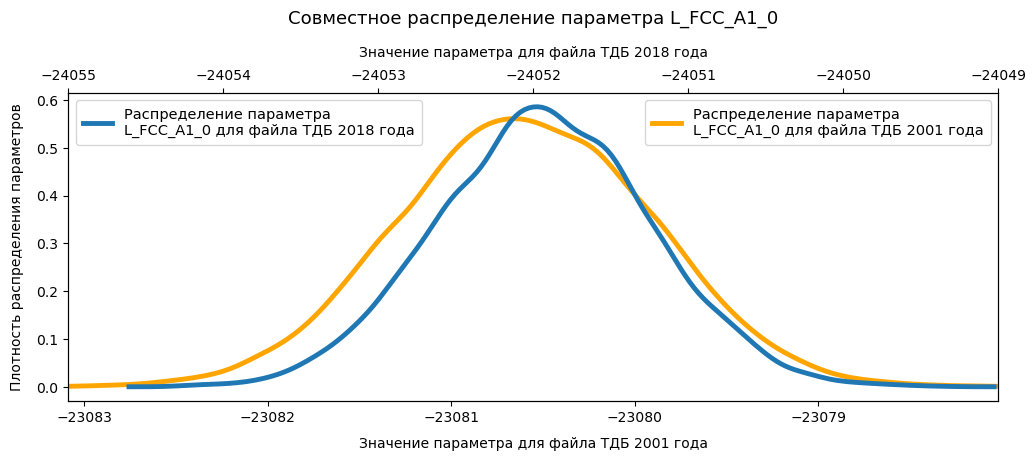

In [27]:
import seaborn as sns

scale01 = [i for i in range(-24055, -24048)]

s = sns.kdeplot(trace_01.posterior["vL0_0"].values.flatten(), label="NUTS")
s18 = sns.kdeplot(trace_018.posterior["vL0_0"].values.flatten(), label="NUTS")
x, y  = s.lines[0].get_data()
x18, y18  = s18.lines[1].get_data()

plt.close()

fig, ax_main = plt.subplots(figsize=(12,4))
ax_main.plot(x, y, color = 'orange', label = 'Распределение параметра \nL_FCC_A1_0 для файла ТДБ 2001 года', linewidth=3.5)

ax2 = ax_main.twiny()
ax2.plot(x18,y18, label = 'Распределение параметра \nL_FCC_A1_0 для файла ТДБ 2018 года', linewidth=3.5)
ax2.set_xlim(trace_018.posterior["vL0_0"].values.flatten().min(), trace_018.posterior["vL0_0"].values.flatten().max())
ax_main.set_xlim(trace_01.posterior["vL0_0"].values.flatten().min(), trace_01.posterior["vL0_0"].values.flatten().max())

plt.title("Совместное распределение параметра L_FCC_A1_0", pad = 16, size = 13)
ax2.set_xlabel('Значение параметра для файла ТДБ 2018 года', labelpad = 9)
ax_main.set_xlabel('Значение параметра для файла ТДБ 2001 года', labelpad = 9)
ax_main.set_ylabel('Плотность распределения параметров', labelpad = 9, rotation = 90)
ax_main.legend(loc = 'upper right', borderpad=0.5, labelspacing=0, prop={'size':10.5} )
ax2.set_xlim(trace_018.posterior["vL0_0"].values.flatten().min(), trace_018.posterior["vL0_0"].values.flatten().max())
ax_main.set_xlim(trace_01.posterior["vL0_0"].values.flatten().min(), trace_01.posterior["vL0_0"].values.flatten().max())
ax2.set_xticks(scale01) 
ax2.legend(loc = 'upper left', borderpad=0.5, labelspacing=0, prop={'size':10.5} )
plt.show()

#### Совместное распределение параметров L_FCC_A1_23_L0_V2 и L_FCC_A1_25_L0_V2

D:\Files\Soft\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Files\Soft\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


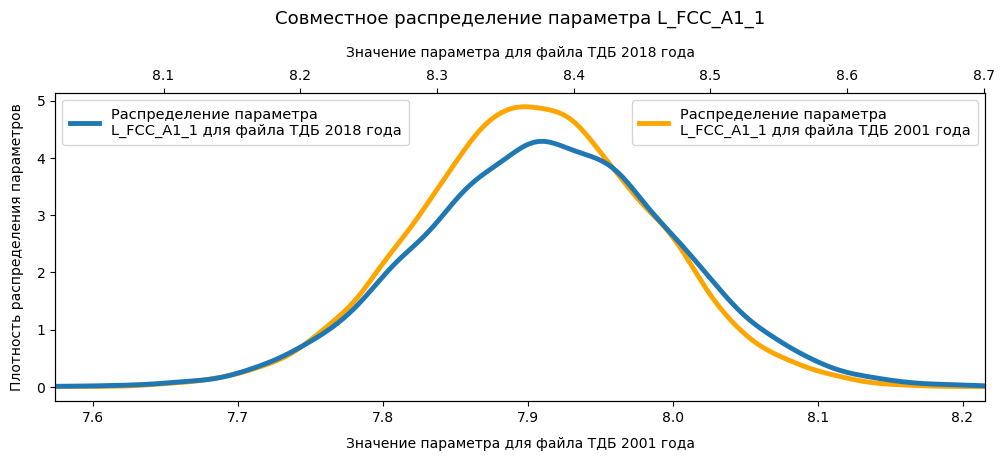

In [28]:
import seaborn as sns

scale01 = [i/10 for i in range(70, 100)]

s = sns.kdeplot(trace_01.posterior["vL0_1"].values.flatten(), label="NUTS")
s18 = sns.kdeplot(trace_018.posterior["vL0_1"].values.flatten(), label="NUTS")
x, y  = s.lines[0].get_data()
x18, y18  = s18.lines[1].get_data()

plt.close()

fig, ax_main = plt.subplots(figsize=(12,4))
ax_main.plot(x, y, color = 'orange', label = 'Распределение параметра \nL_FCC_A1_1 для файла ТДБ 2001 года', linewidth=3.5)

ax2 = ax_main.twiny()
ax2.plot(x18,y18, label = 'Распределение параметра \nL_FCC_A1_1 для файла ТДБ 2018 года', linewidth=3.5)
ax2.set_xlim(trace_018.posterior["vL0_1"].values.flatten().min(), trace_018.posterior["vL0_1"].values.flatten().max())
ax_main.set_xlim(trace_01.posterior["vL0_1"].values.flatten().min(), trace_01.posterior["vL0_1"].values.flatten().max())
plt.title("Совместное распределение параметра L_FCC_A1_1", pad = 16, size = 13)
ax2.set_xlabel('Значение параметра для файла ТДБ 2018 года', labelpad = 9)
ax_main.set_xlabel('Значение параметра для файла ТДБ 2001 года', labelpad = 9)
ax_main.set_ylabel('Плотность распределения параметров', labelpad = 9, rotation = 90)
ax_main.legend(loc = 'upper right', borderpad=0.5, labelspacing=0, prop={'size':10.5} )
ax_main.set_xticks(scale01) 
ax2.set_xticks(scale01) 
ax2.set_xlim(trace_018.posterior["vL0_1"].values.flatten().min(), trace_018.posterior["vL0_1"].values.flatten().max())
ax_main.set_xlim(trace_01.posterior["vL0_1"].values.flatten().min(), trace_01.posterior["vL0_1"].values.flatten().max())
ax2.legend(loc = 'upper left', borderpad=0.5, labelspacing=0, prop={'size':10.5} )
plt.show()

#### Расчет границы фазовых полей для фазы FCC с доверительным интервалом для CoCr-01Oik

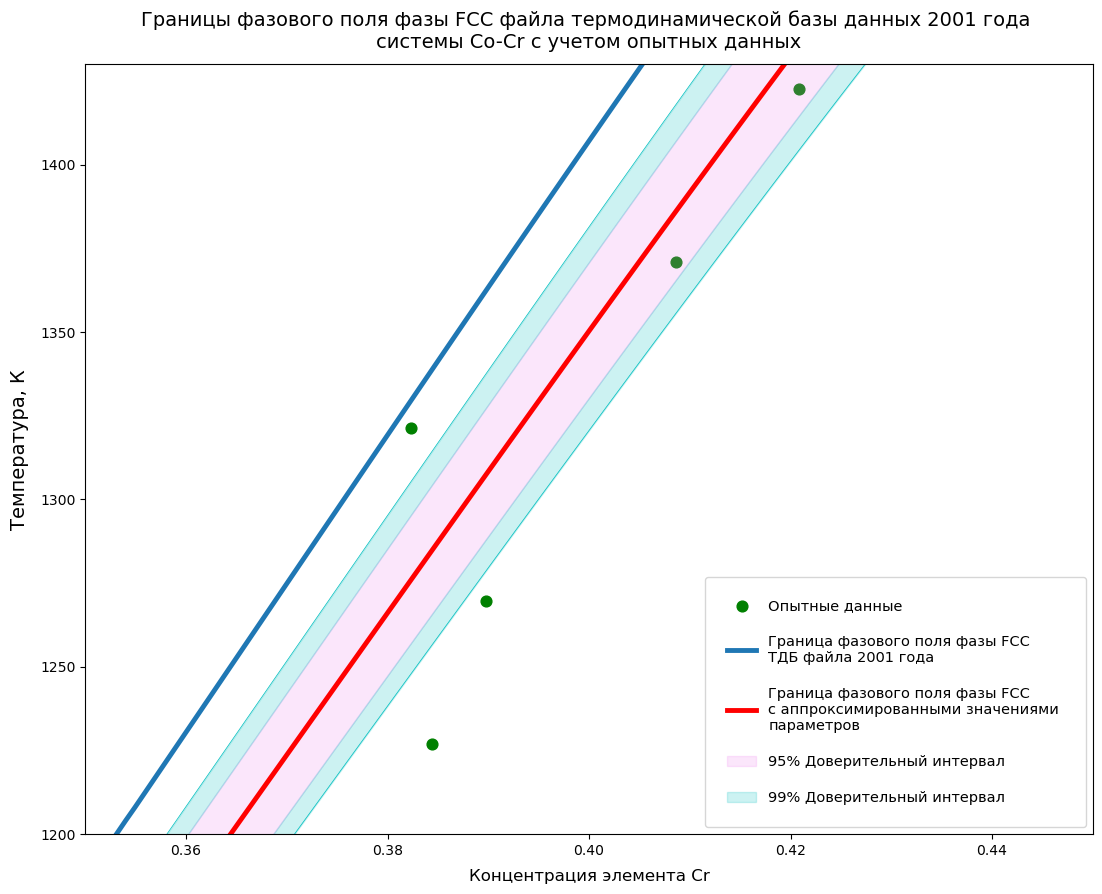

In [29]:
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v
import pandas as pd
import seaborn as sns

tdb_path = Database(app.tdb_path + app.tdb_first_name[:-4] + '_modified.tdb')

def make_condition():
    return {v.X(app.el): (0.35, 0.8, 0.05), v.T: (1200, 1450, 4), v.P: 101325, v.N: 1}

cond = make_condition()


sd01_0 = advi1.approx.std.eval()[0]  # Стандартное отклонение параметра L_FCC_A1_0 для CoCr-01Oik
sd01_1 = advi1.approx.std.eval()[1]  # Стандартное отклонение параметра L_FCC_A1_1 для CoCr-01Oik

mean_01_0 = advi1.approx.mean.eval()[0]  # Среднее значение параметра L_FCC_A1_0 для CoCr-01Oik
mean_01_1 = advi1.approx.mean.eval()[1]  # Среднее значение параметра L_FCC_A1_1 для CoCr-01Oik

fig = plt.figure(figsize=(1,1))
axes = fig.gca()
line = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False})


cs = line.collections[0]
data = cs.get_offsets()
mean_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_23_L0_V1': mean_01_0, 'L_FCC_A1_23_L0_V2': mean_01_1}})
min_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_23_L0_V1': mean_01_0 + 2*sd01_0, 'L_FCC_A1_23_L0_V2': mean_01_1 + 2*sd01_1}})
#
max_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_23_L0_V1': mean_01_0 - 2*sd01_0, 'L_FCC_A1_23_L0_V2': mean_01_1 - 2 * sd01_1}})

min_bp3 = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_23_L0_V1': mean_01_0 + 3*sd01_0, 'L_FCC_A1_23_L0_V2': mean_01_1 + 3*sd01_1}})
#
max_bp3 = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_OLD'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_23_L0_V1': mean_01_0 - 3*sd01_0, 'L_FCC_A1_23_L0_V2': mean_01_1 - 3 * sd01_1}})

plt.close()

mean = mean_bp.collections[1]
data_mean_bp = mean.get_offsets()

mins= min_bp.collections[2]
data_min_bp = mins.get_offsets()

maxs= max_bp.collections[3]
data_max_bp = maxs.get_offsets()

mins3= min_bp.collections[4]
data_min_bp3 = mins3.get_offsets()

maxs3= max_bp.collections[5]
data_max_bp3 = maxs3.get_offsets()

x_mean = [d[0] for d in data_mean_bp if d[0] < 0.5][:60]
y_mean = [d[1] for d in data_mean_bp if d[0] < 0.5][:60]

x_min = [d[0] for d in data_min_bp if d[0] < 0.5][:60]
y_min = [d[1] for d in data_min_bp if d[0] < 0.5][:60]

x_max = [d[0] for d in data_max_bp if d[0] < 0.5][:60]
y_max = [d[1] for d in data_max_bp if d[0] < 0.5][:60]

x_min3 = [d[0] for d in data_min_bp3 if d[0] < 0.5][:60]
y_min3 = [d[1] for d in data_min_bp3 if d[0] < 0.5][:60]

x_max3 = [d[0] for d in data_max_bp3 if d[0] < 0.5][:60]
y_max3 = [d[1] for d in data_max_bp3 if d[0] < 0.5][:60]

fig = plt.figure(figsize=(13, 10))
axes = fig.gca()
x = [d[0] for d in data if d[0] < 0.5]
y = [d[1] for d in data if d[0] < 0.5]

df = pd.read_excel(observer_data).values

for row in range(len(df) - 1):
    plt.scatter(df[row][0], df[row][1], color = 'green', s = 60)
plt.scatter(df[-1][0], df[-1][1], color = 'green', label = 'Опытные данные', s = 60)

plt.plot(x, y, linewidth=3.5, label = 'Граница фазового поля фазы FCC \nТДБ файла 2001 года')
plt.plot(x_mean, y_mean, linewidth=3.5 , color = "red", label = 'Граница фазового поля фазы FCC \nc аппроксимированными значениями \nпараметров')
plt.plot(x_min, y_min, color = "violet", linewidth=0.0)
plt.plot(x_max, y_max, color = "violet", linewidth=0.0)
plt.plot(x_max3, y_max3, color = "c", linewidth=0.5)
plt.plot(x_min3, y_min3, color = "c", linewidth=0.5)

axes.fill_betweenx(
        y=y_min,
        x1=x_min,
        x2=x_max,
        color="violet",
        alpha=0.2,
        label='95% Доверительный интервал'
    )

axes.fill_betweenx(
        y=y_min3,
        x1=x_min3,
        x2=x_min,
        color="c",
        alpha=0.2
    )

axes.fill_betweenx(
        y=y_min3,
        x1=x_max3,
        x2=x_max,
        color="c",
        alpha=0.2,
        label='99% Доверительный интервал'
    )

axes.set_xlim(0.35, 0.45)
axes.set_ylim(1200, 1430)
plt.legend(loc = 'lower right', borderpad=1.5, labelspacing=1.5, prop={'size':10.5} )
plt.title('Границы фазового поля фазы FCC файла термодинамической базы данных 2001 года \nсистемы Co-Cr с учетом опытных данных', pad = 12, size = 14)
plt.ylabel('Температура, К', rotation = 90, size = 14, labelpad = 8)
plt.xlabel('Концентрация элемента Cr', size = 12, labelpad = 8)
plt.show()

#### Расчет средней ширины доверительных интервалов для границы фазового поля фазы FCC файла CoCr-01Oik

In [30]:
average_width_95_01 = round(sum([x - list(x_min)[i] for i, x in enumerate(list(x_max))]) / len(x_max), 5)
print(f'Средняя ширина 95% доверительного интервала для файла {app.tdb_first_name}:', average_width_95_01)

Средняя ширина 95% доверительного интервала для файла CoCr-01Oik.tdb: 0.00946


In [31]:
average_width_99_01 = round(sum([x - list(x_min3)[i] for i, x in enumerate(list(x_max3))]) / len(x_max), 5)
print(f'Средняя ширина 99% доверительного интервала для файла {app.tdb_first_name}:', average_width_99_01)

Средняя ширина 99% доверительного интервала для файла CoCr-01Oik.tdb: 0.01419


#### Расчет границы фазовых полей для фазы FCC с доверительным интервалом для CoCr-18Cac

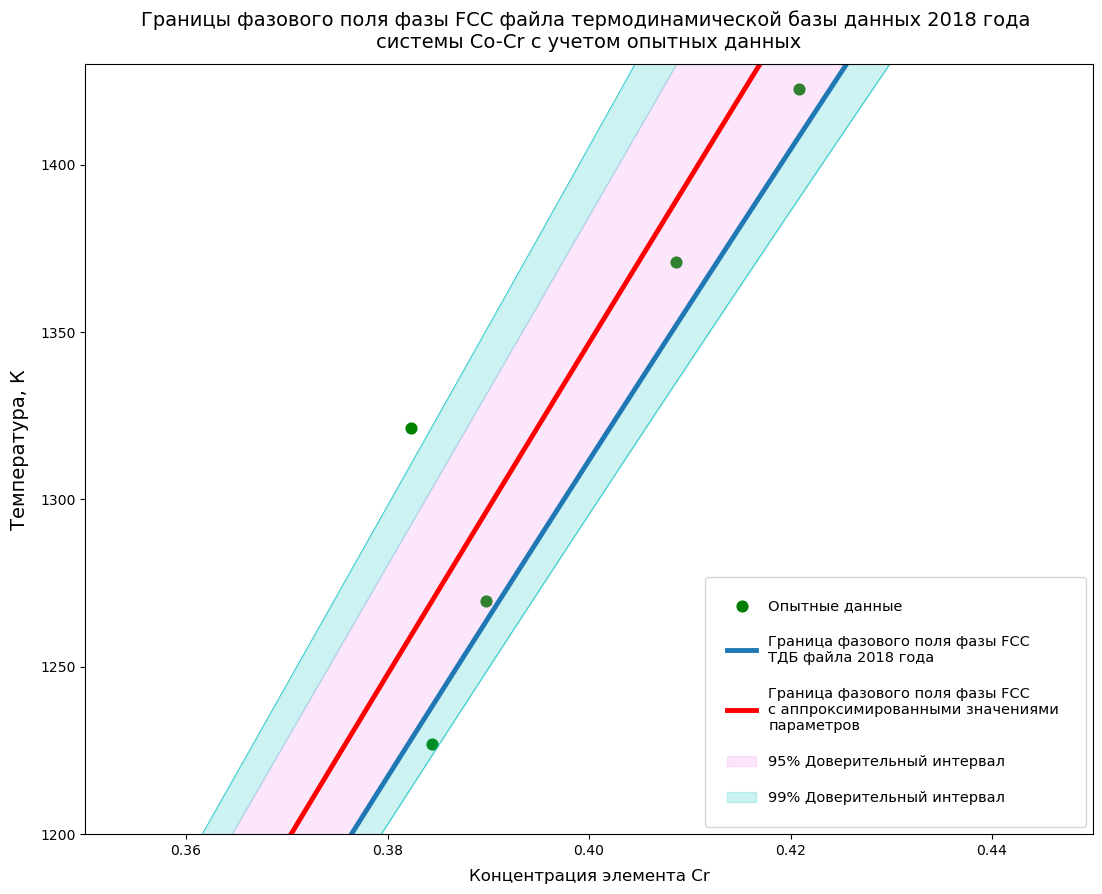

In [32]:
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v
import pandas as pd
import seaborn as sns

tdb_path = Database(app.tdb_path + app.tdb_second_name[:-4] + '_modified.tdb')

def make_condition():
    return {v.X(app.el): (0.35, 0.8, 0.05), v.T: (1200, 1450, 4), v.P: 101325, v.N: 1}

cond = make_condition()


sd018_0 = advi2.approx.std.eval()[0]  # Стандартное отклонение параметра L_FCC_A1_0 для CoCr-18Cac
sd018_1 = advi2.approx.std.eval()[1]  # Стандартное отклонение параметра L_FCC_A1_1 для CoCr-18Cac

mean_18_0 = advi2.approx.mean.eval()[0]  # Среднее значение параметра L_FCC_A1_0 для CoCr-18Cac
mean_18_1 = advi2.approx.mean.eval()[1]  # Среднее значение параметра L_FCC_A1_1 для CoCr-18Cac


fig = plt.figure(figsize=(1,1))
axes = fig.gca()
line = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False})


cs = line.collections[0]
data = cs.get_offsets()
mean_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_25_L0_V1': mean_18_0, 'L_FCC_A1_25_L0_V2': mean_18_1}})

min_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_25_L0_V1': mean_18_0 + 2*sd018_0, 'L_FCC_A1_25_L0_V2': mean_18_1 + 2*sd018_1}})
#
max_bp = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_25_L0_V1': mean_18_0 - 2*sd018_0, 'L_FCC_A1_25_L0_V2': mean_18_1 - 2 * sd018_1}})

min_bp3 = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_25_L0_V1': mean_18_0 + 3*sd018_0, 'L_FCC_A1_25_L0_V2': mean_18_1 + 3*sd018_1}})
#
max_bp3 = binplot(tdb_path, tdb_path.elements, ['FCC_A1', 'SIGMA_D8B'], cond, plot_kwargs={'ax': axes, 'tielines': False},
               eq_kwargs={'parameters': {'L_FCC_A1_25_L0_V1': mean_18_0 - 3*sd018_0, 'L_FCC_A1_25_L0_V2': mean_18_1 - 3 * sd018_1}})

plt.close()


mean = mean_bp.collections[1]
data_mean_bp = mean.get_offsets()

mins= min_bp.collections[2]
data_min_bp = mins.get_offsets()

maxs= max_bp.collections[3]
data_max_bp = maxs.get_offsets()

mins3= min_bp.collections[4]
data_min_bp3 = mins3.get_offsets()

maxs3= max_bp.collections[5]
data_max_bp3 = maxs3.get_offsets()

x_mean = [d[0] for d in data_mean_bp if d[0] < 0.45][:60]
y_mean = [d[1] for d in data_mean_bp if d[0] < 0.45][:60]

x_min = [d[0] for d in data_min_bp if d[0] < 0.45][:60]
y_min = [d[1] for d in data_min_bp if d[0] < 0.45][:60]

x_max = [d[0] for d in data_max_bp if d[0] < 0.45][:60]
y_max = [d[1] for d in data_max_bp if d[0] < 0.45][:60]

x_min3 = [d[0] for d in data_min_bp3 if d[0] < 0.45][:60]
y_min3 = [d[1] for d in data_min_bp3 if d[0] < 0.45][:60]

x_max3 = [d[0] for d in data_max_bp3 if d[0] < 0.45][:60]
y_max3 = [d[1] for d in data_max_bp3 if d[0] < 0.45][:60]

fig = plt.figure(figsize=(13, 10))
axes = fig.gca()
x = [d[0] for d in data if d[0] < 0.5]
y = [d[1] for d in data if d[0] < 0.5]

df = pd.read_excel(observer_data).values

for row in range(len(df) - 1):
    plt.scatter(df[row][0], df[row][1], color = 'green', s = 60)
plt.scatter(df[-1][0], df[-1][1], color = 'green', label = 'Опытные данные', s = 60)

plt.plot(x, y, linewidth=3.5, label = 'Граница фазового поля фазы FCC \nТДБ файла 2018 года')
plt.plot(x_mean, y_mean, linewidth=3.5 , color = "red", label = 'Граница фазового поля фазы FCC \nc аппроксимированными значениями \nпараметров')
plt.plot(x_min, y_min, color = "violet", linewidth=0.0)
plt.plot(x_max, y_max, color = "violet", linewidth=0.0)
plt.plot(x_max3, y_max3, color = "c", linewidth=0.5)
plt.plot(x_min3, y_min3, color = "c", linewidth=0.5)

axes.fill_betweenx(
        y=y_min,
        x1=x_min,
        x2=x_max,
        color="violet",
        alpha=0.2,
        label='95% Доверительный интервал'
    )

axes.fill_betweenx(
        y=y_min3,
        x1=x_min3,
        x2=x_min,
        color="c",
        alpha=0.2
    )

axes.fill_betweenx(
        y=y_min3,
        x1=x_max3,
        x2=x_max,
        color="c",
        alpha=0.2,
        label='99% Доверительный интервал'
    )

axes.set_xlim(0.35, 0.45)
axes.set_ylim(1200, 1430)
plt.legend(loc = 'lower right', borderpad=1.5, labelspacing=1.5, prop={'size':10.5} )
plt.title('Границы фазового поля фазы FCC файла термодинамической базы данных 2018 года \nсистемы Co-Cr с учетом опытных данных', pad = 12, size = 14)
plt.ylabel('Температура, К', rotation = 90, size = 14, labelpad = 8)
plt.xlabel('Концентрация элемента Cr', size = 12, labelpad = 8)
plt.show()

#### Расчет средней ширины доверительных интервалов для границы фазового поля фазы FCC файла CoCr-18Cac

In [33]:
average_width_95_018 = round(sum([x - list(x_min)[i] for i, x in enumerate(list(x_max))]) / len(x_max), 5)
print(f'Средняя ширина 95% доверительного интервала для файла {app.tdb_second_name}:', average_width_95_018)

Средняя ширина 95% доверительного интервала для файла CoCr-18Cac.tdb: 0.01423


In [34]:
average_width_99_018 = round(sum([x - list(x_min3)[i] for i, x in enumerate(list(x_max3))]) / len(x_max), 5)
print(f'Средняя ширина 99% доверительного интервала для файла {app.tdb_second_name}:', average_width_99_018)

Средняя ширина 99% доверительного интервала для файла CoCr-18Cac.tdb: 0.02135


#### Расчет статистических критериев для сравнения моделей

In [36]:
import pymc as pm
import arviz as az
import cloudpickle


samples = 10000

trace01 = mean_field1.sample(samples)

with model1:
    trace_logp_01 = pm.compute_log_likelihood(trace01) # Вычисление логоримфа правдоподобия
    
result = {'trace01': trace01,
          'trace_logp_01': trace_logp_01}

with open(f'./traces/trace01_{samples}.pkl', 'wb') as buff:
    cloudpickle.dump(result, buff) # Запись результата трасировки в файл

Output()

In [40]:
import arviz as az

samples = 10000

trace018 = mean_field2.sample(samples)

with model2:
    trace_logp_02 = pm.compute_log_likelihood(trace018) # Вычисление логоримфа правдоподобия
    
result = {'trace018': trace018,
          'trace_logp_018': trace_logp_02}

with open(f'./traces/trace018_{samples}.pkl', 'wb') as buff:
    cloudpickle.dump(result, buff) # Запись результата трасировки в файл

Output()

In [41]:
import cloudpickle

with open('./traces/trace01_10000.pkl', 'rb') as buff:   # Трассировка для CoCr-01Oik
            trace01 = cloudpickle.load(buff)

with open('./traces/trace018_10000.pkl', 'rb') as buff:  # Трассировка для CoCr-18Cac 
            trace02 = cloudpickle.load(buff)
        
trace01 = trace01['trace01']
trace018 = trace02['trace018']

#### Расчет LOO

In [42]:
import arviz as az
df_comp_loo = az.compare({"Файл ТДБ 2001 года": trace01, "Файл ТДБ 2018 года":  trace018},  ic = 'loo')
df_comp_loo = df_comp_loo[['rank', 'elpd_loo', 'p_loo']]
df_comp_loo

C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\delux\AppData\Roaming\Python\Python

,rank,elpd_loo,p_loo
Файл ТДБ 2001 года,0,-4.900754e+12,4.260171e+12
Файл ТДБ 2018 года,1,-6.480525e+12,6.187481e+12


Модели, содержащиеся в файлах, располагаются в порядке от наиболее соответствующей экспериментальным данным 
до наименее соответствующей экспериментальным данным. Где ранк 0 - самая точная модель.
 
Соответственно ТДБ файл 2001 года лучше описывает представленные данные согласно расчету информационного критерия LOO

In [43]:
import arviz as az
df_comp_loo = az.compare({"Файл ТДБ 2001 года": trace01, "Файл ТДБ 2018 года":  trace018},  ic = 'waic')
df_comp_loo = df_comp_loo[['rank', 'elpd_waic', 'p_waic']]
df_comp_loo

C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:1632: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\delux\AppData\Roaming\Python\Python310\site-packages\arviz\stats\stats.py:242: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] += (exp_ic_i[i, k] - exp_ic_i[i, km1]) / np.dot(exp_ic_i[i], w_full)


,rank,elpd_waic,p_waic
Файл ТДБ 2001 года,0,-4.692571e+21,4.692571e+21
Файл ТДБ 2018 года,1,-2.548076e+22,2.548076e+22


Модели, содержащиеся в файлах, располагаются в порядке от наиболее соответствующей экспериментальным данным до наименее соответствующей экспериментальным данным. Где ранк 0 - самая точная модель.

Соответственно ТДБ файл 2001 года лучше описывает представленные данные согласно расчету информационного критерия WAIC

In [46]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
